In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D, Bidirectional, GRU

In [2]:
df_train = pd.read_csv('train.tsv', sep='\t')
print('train set: {0}'.format(df_train.shape))
df_train.head(10)

train set: (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [3]:
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(text):
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

In [4]:
X_train = df_train['Phrase'].apply(lambda p: clean_text(p))

max phrase len: 53


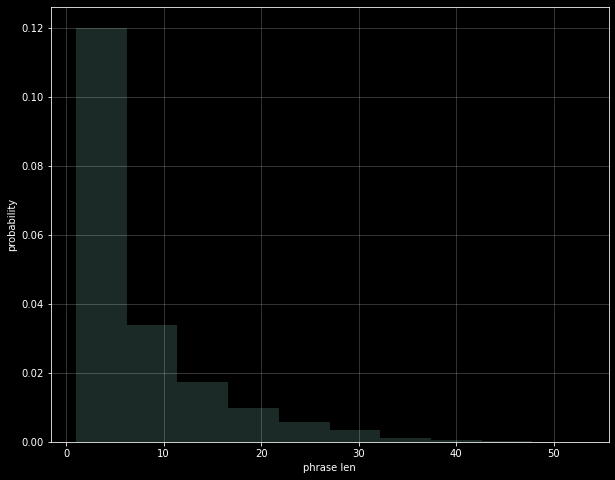

In [5]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid(alpha = 0.25)

In [6]:
y_train = df_train['Sentiment']

In [7]:
max_words = 8192
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)
y_train = to_categorical(y_train)

In [8]:
batch_size = 512
epochs = 8

# LSTM

## Model 1

In [9]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [10]:
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

Epoch 1/8
275/275 [==============================] - 730s 3s/step - loss: 1.0524 - accuracy: 0.5817 - val_loss: 1.0055 - val_accuracy: 0.5964
Epoch 2/8
275/275 [==============================] - 680s 2s/step - loss: 0.8483 - accuracy: 0.6591 - val_loss: 1.0033 - val_accuracy: 0.6023
Epoch 3/8
275/275 [==============================] - 671s 2s/step - loss: 0.7960 - accuracy: 0.6783 - val_loss: 1.0067 - val_accuracy: 0.6044
Epoch 4/8
275/275 [==============================] - 643s 2s/step - loss: 0.7611 - accuracy: 0.6907 - val_loss: 1.0178 - val_accuracy: 0.6080
Epoch 5/8
275/275 [==============================] - 646s 2s/step - loss: 0.7353 - accuracy: 0.6998 - val_loss: 1.0431 - val_accuracy: 0.6008
Epoch 6/8
275/275 [==============================] - 645s 2s/step - loss: 0.7143 - accuracy: 0.7079 - val_loss: 1.0556 - val_accuracy: 0.6070
Epoch 7/8
275/275 [==============================] - 642s 2s/step - loss: 0.6965 - accuracy: 0.7132 - val_loss: 1.0863 - val_accuracy: 0.5986
Epoch 

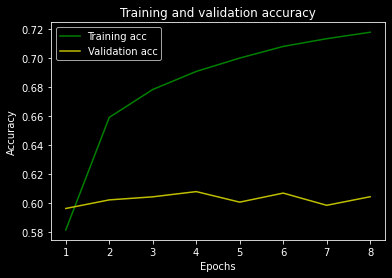

In [11]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot([*range(1,9)], acc, 'g', label='Training acc')
plt.plot([*range(1,9)], val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 2

In [12]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3, return_sequences=True))
model_lstm.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

Epoch 1/8
275/275 [==============================] - 1220s 4s/step - loss: 1.0701 - accuracy: 0.5760 - val_loss: 1.0100 - val_accuracy: 0.5944
Epoch 2/8
275/275 [==============================] - 1306s 5s/step - loss: 0.8583 - accuracy: 0.6559 - val_loss: 0.9997 - val_accuracy: 0.6006
Epoch 3/8
275/275 [==============================] - 1339s 5s/step - loss: 0.8083 - accuracy: 0.6738 - val_loss: 0.9873 - val_accuracy: 0.6080
Epoch 4/8
275/275 [==============================] - 1405s 5s/step - loss: 0.7726 - accuracy: 0.6878 - val_loss: 1.0155 - val_accuracy: 0.6034
Epoch 5/8
275/275 [==============================] - 1738s 6s/step - loss: 0.7459 - accuracy: 0.6985 - val_loss: 1.0032 - val_accuracy: 0.6096
Epoch 6/8
275/275 [==============================] - 1896s 7s/step - loss: 0.7241 - accuracy: 0.7064 - val_loss: 1.0248 - val_accuracy: 0.6096
Epoch 7/8
104/275 [==========>...................] - ETA: 18:45 - loss: 0.6945 - accuracy: 0.7178

## Model 3

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(Bidirectional(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3)))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot([*range(1,9)], acc, 'g', label='Training acc')
plt.plot([*range(1,9)], val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# GRU

## Model 1

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_gru.add(SpatialDropout1D(0.25))
model_gru.add(Bidirectional(GRU(128,return_sequences=True)))
model_gru.add(Bidirectional(GRU(64,return_sequences=False)))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

In [ ]:
history = model_gru.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot([*range(1,9)], acc, 'g', label='Training acc')
plt.plot([*range(1,9)], val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_gru.add(SpatialDropout1D(0.25))
model_gru.add(GRU(128,return_sequences=True))
model_gru.add(GRU(64,return_sequences=False))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

In [ ]:
history = model_gru.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot([*range(1,9)], acc, 'g', label='Training acc')
plt.plot([*range(1,9)], val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 3

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len))
model_gru.add(SpatialDropout1D(0.25))
model_gru.add(Bidirectional(GRU(128,return_sequences=True)))
model_gru.add(Bidirectional(GRU(64,return_sequences=False)))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

In [ ]:
history = model_gru.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 512
)

In [ ]:
max_features = 15000
EMBEDDING_FILE = "glove.6B.100d.txt"

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features,embed_dim):
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) 
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return embedding_matrix
   
embed_dim = 100
embedding_matrix = get_embed_mat(EMBEDDING_FILE,max_features,embed_dim)
print(embedding_matrix.shape)  

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length=X_train.shape[1], weights=[embedding_matrix],trainable=True))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(GRU(128,return_sequences=True)))
model.add(Bidirectional(GRU(64,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 4,
    batch_size = 256
)

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot([*range(1,5)], acc, 'g', label='Training acc')
plt.plot([*range(1,5)], val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 8,
    batch_size = 256
)

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot([*range(1,9)], acc, 'g', label='Training acc')
plt.plot([*range(1,9)], val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()